/tmp/ipykernel_1791/1791203716.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


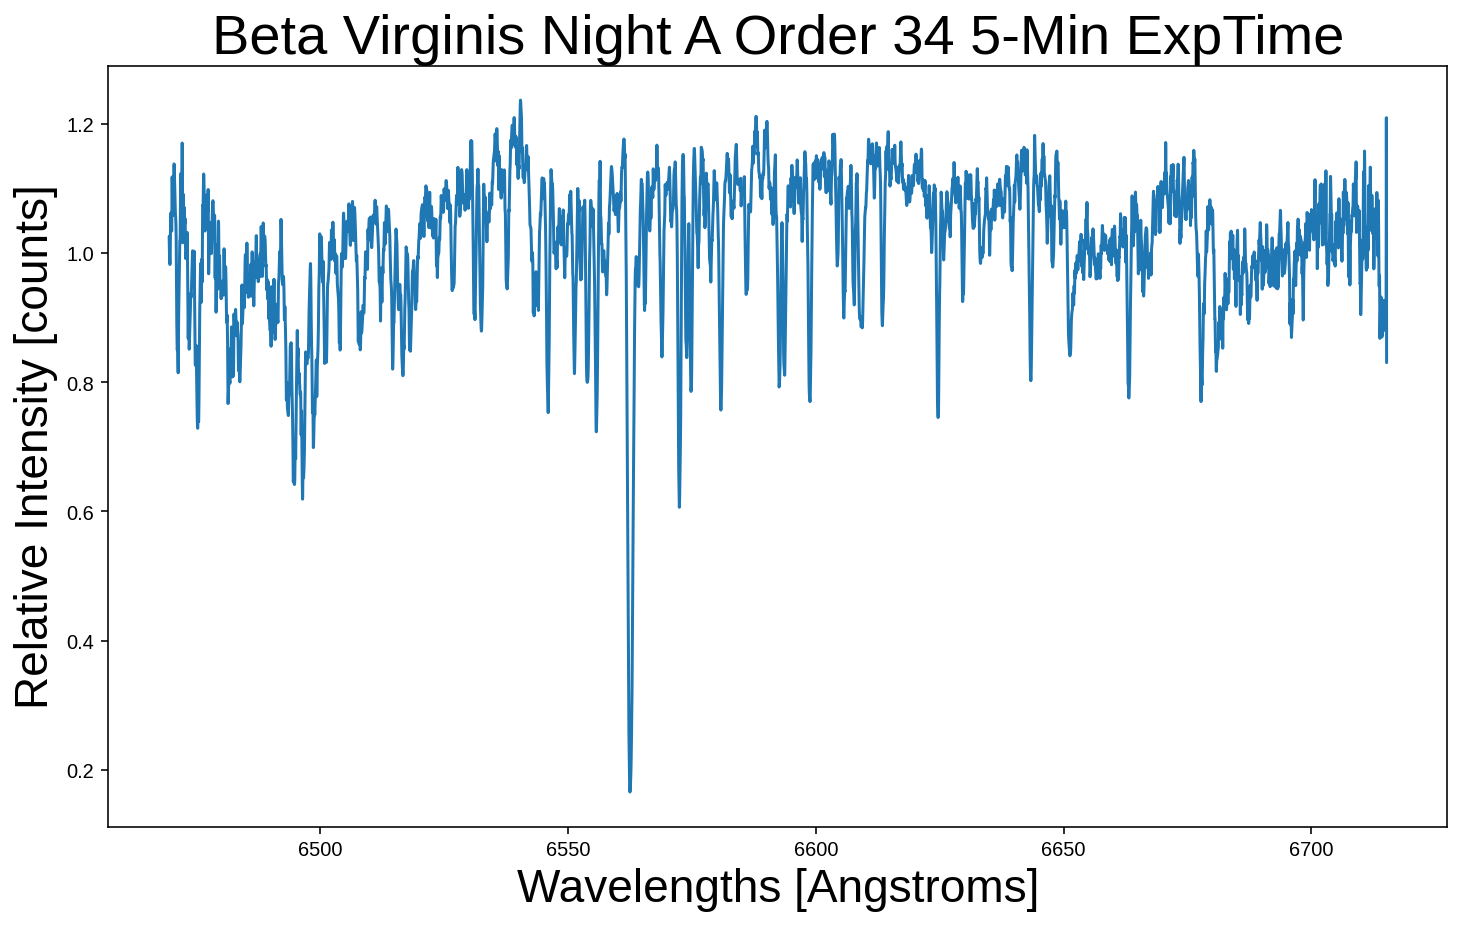

In [3]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker

#read file
from astropy.io import fits
dir='/home/user/EMILYS_FITS_DATA/Beta_Virginis_NightA_5/'
file_list = ['34.fit']
#file_list=['44.fit','43.fit','42.fit','41.fit','40.fit','39.fit','38.fit','37.fit','36.fit','35.fit','34.fit','33.fit','32.fit','31.fit','30.fit','45.fit','46.fit','47.fit','48.fit','49.fit','50.fit','51.fit','52.fit']

#wave_all=[]
#flux=[]

for i in range(0,np.size(file_list)):    
#for i in range(0,2):

    df=fits.open(dir+file_list[i])
    #df.info()

    data = df[0].data

    hdr = df[0].header
    #hdr

    start_wave=hdr['CRVAL1']
    #print(start_wave)
    wave_step=hdr['CDELT1']
    #print(wave_step)
    num_wave_points=hdr['NAXIS1']
    end_wave=start_wave+wave_step*num_wave_points
    wavelengths=np.linspace(start_wave,end_wave,num_wave_points)

    wavelengths

    fig, ax = plt.subplots()

    plt.style.use('seaborn-whitegrid')
    ax.plot(wavelengths, data)
    ax.set_xlabel("Wavelengths [Angstroms]", fontsize = 23)
    ax.set_title("Beta Virginis Night A Order 34 5-Min ExpTime", fontsize = 28)
    ax.set_ylabel("Relative Intensity [counts]", fontsize = 23)


/tmp/ipykernel_1791/4077291912.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


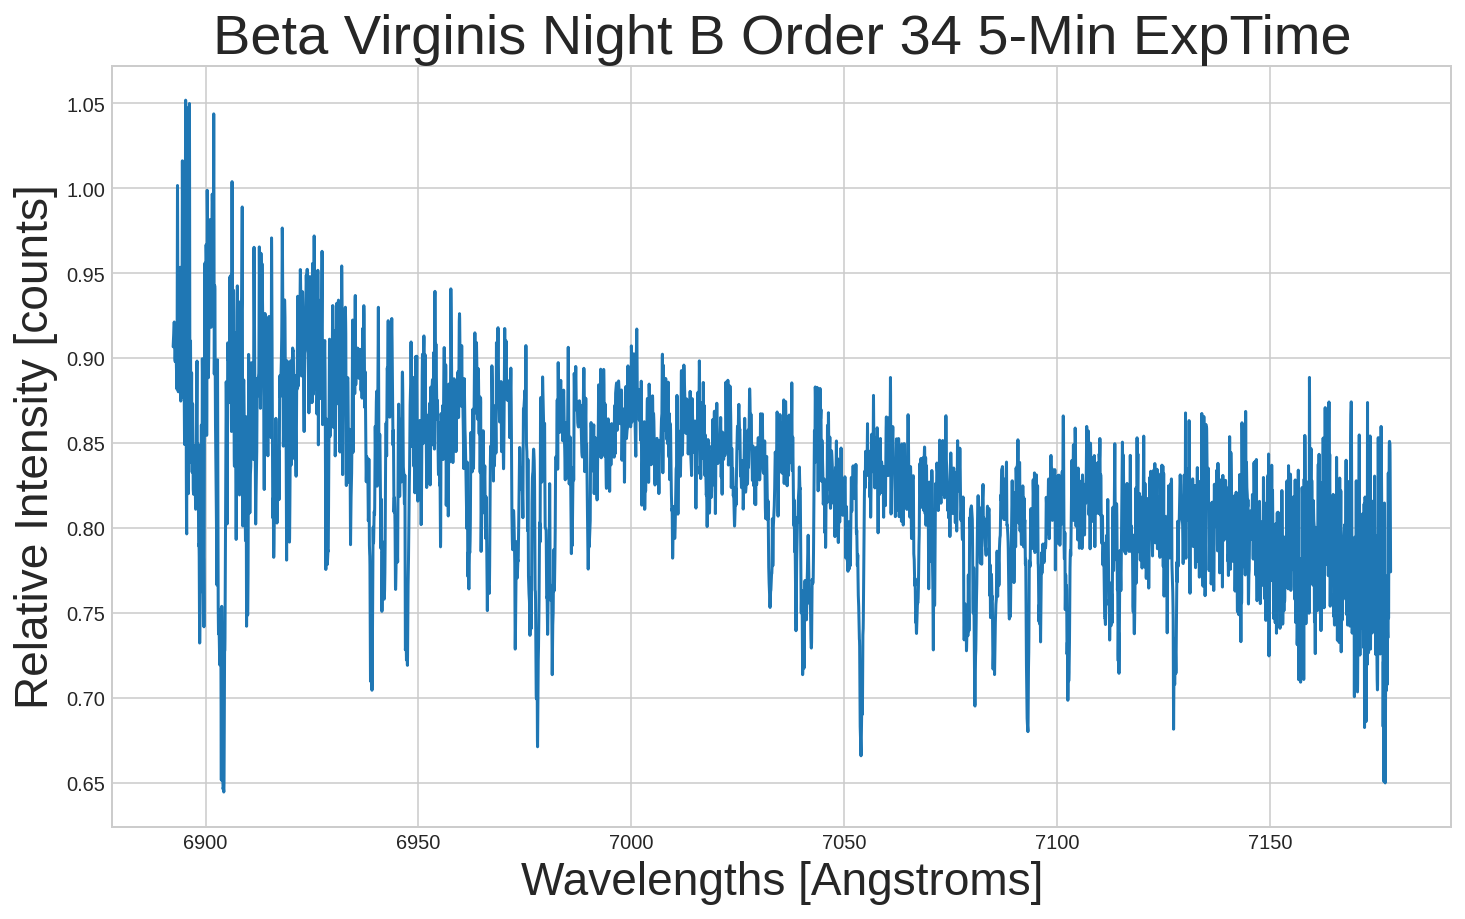

In [4]:

dir='/home/user/EMILYS_FITS_DATA/BVB5/'
file_list1 = ['34.fit']
for i in range(0,np.size(file_list1)):    
    df=fits.open(dir+file_list1[i])
    #df.info()
    data = df[0].data
    hdr = df[0].header
    #hdr
    start_wave=hdr['CRVAL1']
    wave_step=hdr['CDELT1']
    num_wave_points=hdr['NAXIS1']
    end_wave=start_wave+wave_step*num_wave_points
    wavelengths=np.linspace(start_wave,end_wave,num_wave_points)
    wavelengths
    fig, ax = plt.subplots()
    #ax.set_xlim(6560, 6570)
    #ax.set_ylim(0.4, 1.45)
    plt.style.use('seaborn-whitegrid')
    ax.plot(wavelengths, data)
    #plot labels
    ax.set_xlabel("Wavelengths [Angstroms]", fontsize = 23)
    ax.set_title("Beta Virginis Night B Order 34 5-Min ExpTime", fontsize = 28)
    ax.set_ylabel("Relative Intensity [counts]", fontsize = 23)

In [ ]:
#quality check of RV
#algorithm for Radial Velocity (RV)
#read fits file
#yields array of intensity vs wavelength
#wavelegnth transformation  v/c = dellam/lam = dlam/lam -> screams ln
#log transform wavelength
#cross correlation (star 1A,star 2A) --> array Power vs shift and plot that, find peak by fitting and that equals our shift in the x ais whihc equals the v over c 

SIMPLE  =                    T                                                  BITPIX  =                  -32 / bits per data value                            NAXIS   =                    1 / Number of data axes                            NAXIS1  =                 9715 / Length of data axis 1                          SWCREATE= 'Demetra v5.1.2.0' / Software used to generate this file              EXPTIME =                    0 / [s] Total observation duration                 CDELT1  =  0.02457425557076931 / Wavelength pixel step (Angstrom)               CRVAL1  =       6284.806640625 / Wavelength pixel start (Angstrom)              BSCALE  =                    1 / linear factor in scaling equation              BZERO   =                    0 / zero point in scaling equation                 BSS_VHEL=                    0 / [km/s] Heliocentric velocity                   CRPIX1  =                    1 / Pixel start                                    CTYPE1  = 'Wavelength' / Axis 1 descript

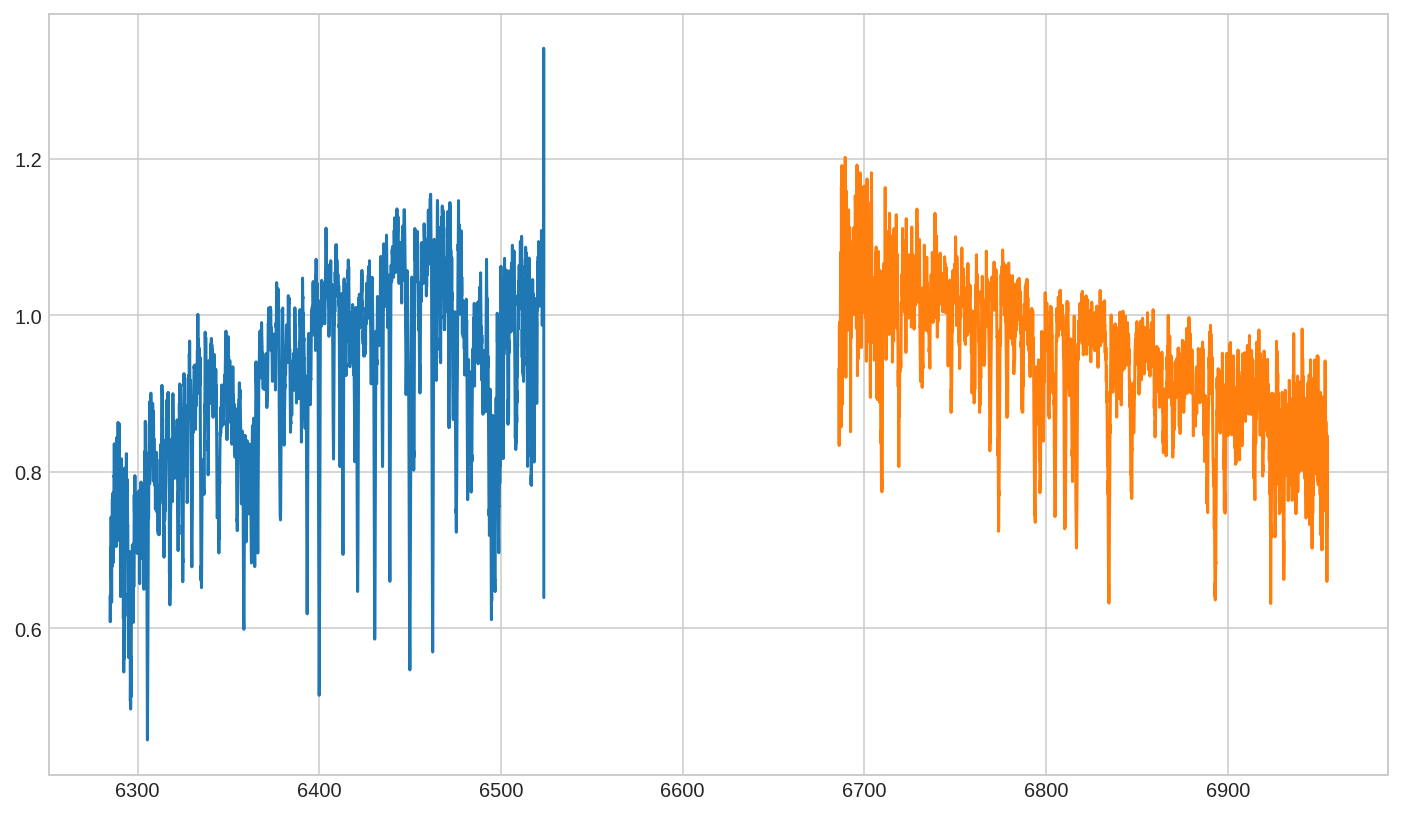

In [45]:
from specutils.analysis import correlation
from astropy import units as u
from astropy.modeling import models
import numpy as np
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum1D, SpectralRegion
import matplotlib.pyplot as plt
dir1='/home/user/EMILYS_FITS_DATA/Beta_Virginis_NightA_5/'
file1='35.fit'
dir2='/home/user/EMILYS_FITS_DATA/testfolder/'
file2='Newobservation_20230416034739_35.fit'
    
df=fits.open(dir1+file1)
#df.info()

data1 = df[0].data

hdr = df[0].header
print(hdr)

start_wave=hdr['CRVAL1']
    #print(start_wave)
wave_step=hdr['CDELT1']
    #print(wave_step)
num_wave_points=hdr['NAXIS1']
end_wave=start_wave+wave_step*num_wave_points
wavelengths1=np.linspace(start_wave,end_wave,num_wave_points)

    
df=fits.open(dir2+file2)
    #df.info()

data2 = df[0].data

hdr = df[0].header
#print(hdr)

start_wave=hdr['CRVAL1']
    #print(start_wave)
wave_step=hdr['CDELT1']
    #print(wave_step)
num_wave_points=hdr['NAXIS1']
end_wave=start_wave+wave_step*num_wave_points
wavelengths2=np.linspace(start_wave,end_wave,num_wave_points)
    
spectral_axis1 = wavelengths1*u.AA
spectral_axis2 = wavelengths2*u.AA
spec_flux1=data1*u.Jy
spec_flux2=data2*u.Jy
fig, ax=plt.subplots()
ax.plot(wavelengths1, data1)
ax.plot(wavelengths2, data2)

expected lag:  1196.4107676969093
expected lag:  0.0
[-11588.51981757 -11587.2426566  -11585.96548997 ...  12051.72389523
  12053.10581672  12054.48774434] km / s
[0.00000000e+00 0.00000000e+00 1.74147456e-13 ... 1.74147456e-13
 0.00000000e+00 0.00000000e+00]


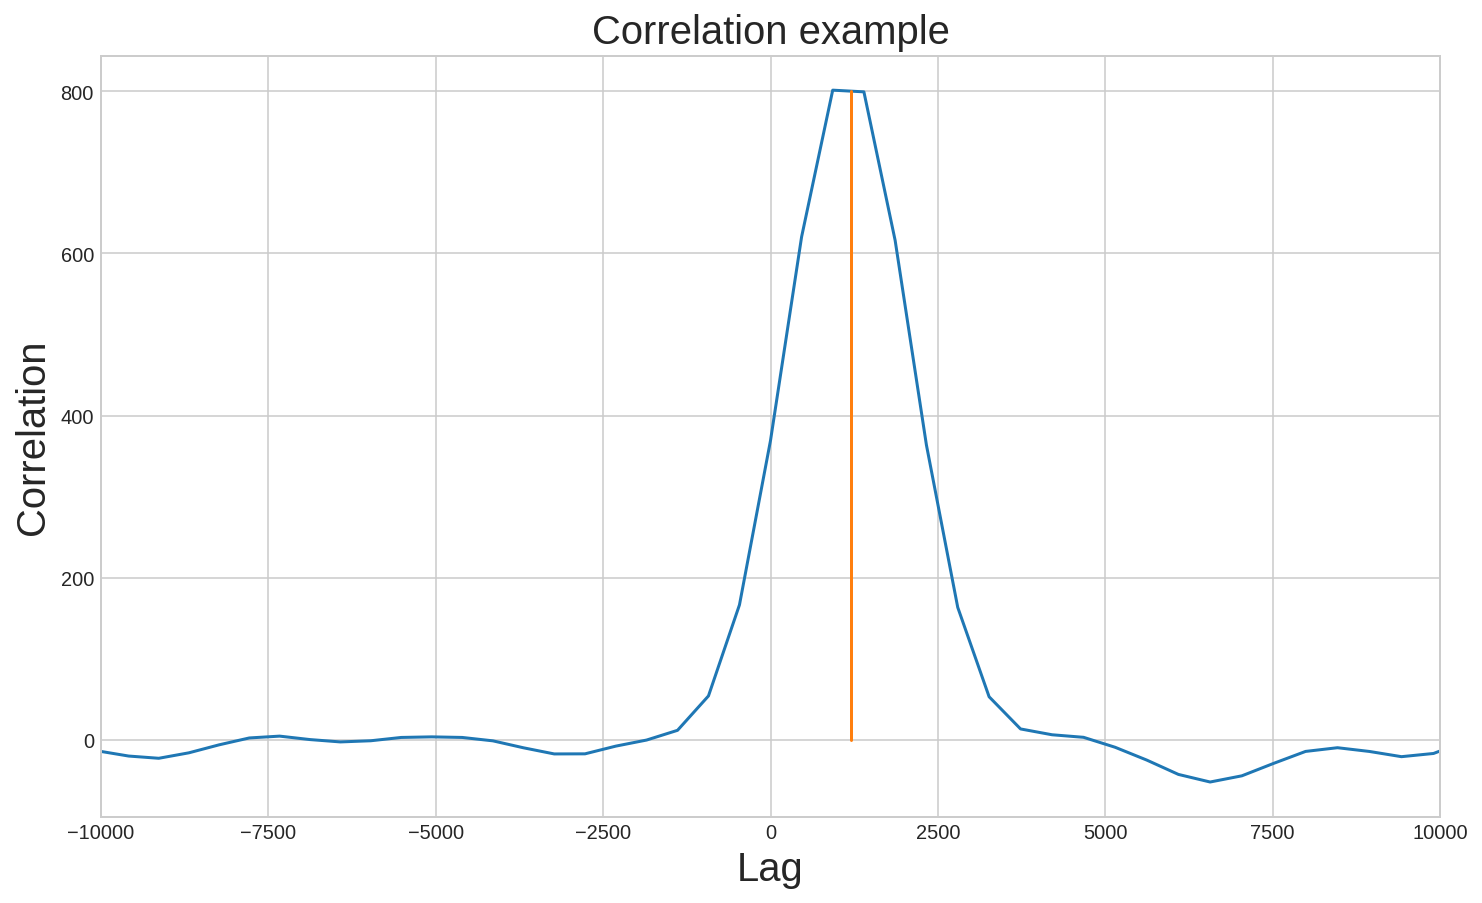

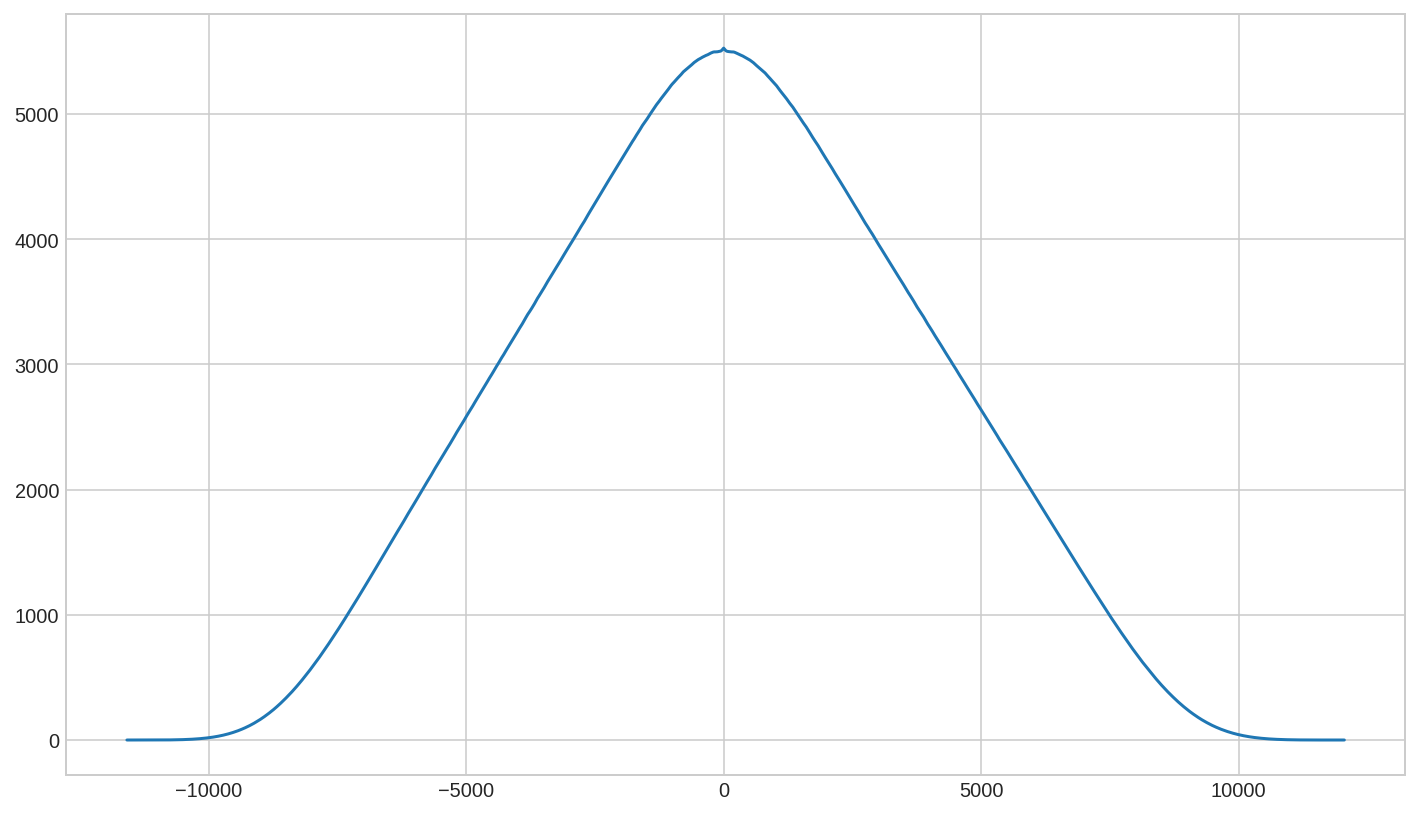

In [47]:
from specutils.analysis import correlation
from astropy import units as u
from astropy.modeling import models
import numpy as np
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum1D, SpectralRegion
import matplotlib.pyplot as plt

np.random.seed(42)
spectral_axis = np.linspace(11., 1., 200) * u.GHz
#wavelengths=np.linspace(start_wave,end_wave,num_wave_points)
#spectral_axis = np.linspace(start_wave,end_wave,num_wave_points)*u.AA

spectral_model = models.Gaussian1D(amplitude=5*(2*np.pi*0.8**2)**-0.5*u.Jy, mean=5*u.GHz, stddev=0.8*u.GHz)
flux = spectral_model(spectral_axis)
flux += np.random.normal(0., 0.05, spectral_axis.shape) * u.Jy
uncertainty = StdDevUncertainty(0.2*np.ones(flux.shape)*u.Jy)
noisy_gaussian = Spectrum1D(spectral_axis=spectral_axis, flux=flux, uncertainty=uncertainty)
import matplotlib.pyplot as plt 

fig, ax=plt.subplots()
#ax.step(noisy_gaussian.spectral_axis, noisy_gaussian.flux) 
size = 200
spec_axis = np.linspace(4500., 6500., num=size) * u.AA
f1 = np.random.randn(size)*0.5 * u.Jy
f2 = np.random.randn(size)*0.5 * u.Jy
rest_value = 6000. * u.AA
mean1 = 5035. * u.AA
mean2 = 5015. * u.AA
g1 = models.Gaussian1D(amplitude=30 * u.Jy, mean=mean1, stddev=10. * u.AA)
g2 = models.Gaussian1D(amplitude=30 * u.Jy, mean=mean2, stddev=10. * u.AA)
flux1 = f1 + g1(spec_axis)
flux2 = f2 + g2(spec_axis)
uncertainty = StdDevUncertainty(0.2*np.ones(size)*u.Jy)



ospec = Spectrum1D(spectral_axis=spec_axis, flux=flux1, uncertainty=uncertainty, velocity_convention='optical', rest_value=rest_value)
tspec = Spectrum1D(spectral_axis=spec_axis, flux=flux2, uncertainty=uncertainty)
corr, lag = correlation.template_correlate(ospec, tspec)
ax.plot(lag,corr)
ax.set_xlim(-10000,10000)
ax.set_xlabel("Lag", fontsize = 20)
ax.set_title("Correlation example", fontsize = 20)
ax.set_ylabel("Correlation", fontsize = 20)
#
# FOR Example, the shift should be (20/5015)*3
#
expected=3e5*(20/5015)
print('expected lag: ', expected)
ax.plot([expected,expected],[0,800])


fig, ax = plt.subplots()
#spectral_axis = np.linspace(start_wave,end_wave,num_wave_points)*u.AA
#spec_flux=data*u.Jy
spec_size1=np.size(data1)
spec_size2=np.size(data2)
spec_uncertainty1 = StdDevUncertainty(0.02*np.ones(spec_size1)*u.Jy)
spec_uncertainty2 = StdDevUncertainty(0.02*np.ones(spec_size2)*u.Jy)
ospec = Spectrum1D(spectral_axis=spectral_axis1, flux=spec_flux1, uncertainty=spec_uncertainty1, velocity_convention='optical', rest_value=rest_value)
tspec = Spectrum1D(spectral_axis=spectral_axis2, flux=spec_flux2, uncertainty=spec_uncertainty2)
corr, lag = correlation.template_correlate(tspec, tspec)
expected=3e5*(0/5015)
print('expected lag: ', expected)
print(lag)
print(corr)
ax.plot(lag,corr)
#ax.plot([expected,expected],[0,8000])
#use gaussian mean as the uncertainty 
#relative intensity [counts]